<h1>Generating Sample Dataset</h1>

Initially, our objective entails acquiring a dataset for the purpose of classification. While there exist numerous readily available datasets, we are inclined towards generating a custom dataset. To accomplish this, we employ the numpy library, renowned for its numerical computing capabilities.

Our methodology necessitates the utilization of three parameters, namely num_samples, num_features, and class_ratio. For the sake of convenient visualization of the dataset, we opt to set the number of features to 2. The class_ratio parameter serves the purpose of determining the proportion of instances labeled as either 1 or 0, as we specifically aim to construct a binary classification dataset.

Furthermore, in order to ensure data consistency and reproducibility, we employed the <b><i>np.random.seed module</i></b>, which guarantees that the dataset generated remains identical each time the experiment is conducted.

In [1]:
import numpy as np

np.random.seed(123)
def generate_binary_dataset(num_samples,num_features,class_ratio):
    #Using the class ratio to divide samples into two classes 
    num_samples_positive = int(num_samples*class_ratio)
    
    #Generate positive samples
    X_positive = np.random.randn(num_samples_positive,num_features)
    X_positive[:,0] = np.random.uniform(-2,3,num_samples_positive)
    y_positive = np.ones([num_samples_positive,1])
    
    #Generate negative samples
    num_sample_negative = num_samples - num_samples_positive
    X_negative = np.random.randn(num_sample_negative,num_features)
    X_negative[:,0] = np.random.uniform(2.5,6,num_sample_negative)
    y_negative = np.zeros([num_sample_negative,1])
    
    #Concatenating the samples
    X = np.concatenate([X_positive,X_negative])
    y = np.concatenate([y_positive,y_negative])
    
    #Shuffling the dataset
    indices = np.random.permutation(num_samples)
    X = X[indices]
    y = y[indices]
    
    return X,y

<h1>Plotting the dataset</h1>

By setting the class_ratio parameter to 0.55, we indicate that 55% of the data points within our dataset are assigned a label of 1, while the remaining 45% are assigned a label of 0. Subsequently, we proceed to visualize the dataset, and upon inspection, it becomes evident that the dataset exhibits characteristics conducive to serving as a binary classification dataset.

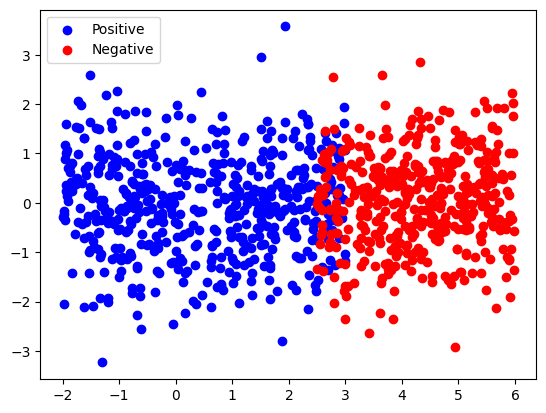

In [2]:
class_ratio = 0.55
num_samples = 1000
num_features = 2

import matplotlib.pyplot as plt
X,y = generate_binary_dataset(num_samples,num_features,class_ratio)

x1 = X[:,0].reshape(-1,1)
x2 = X[:,1].reshape(-1,1)

plt.scatter(x1[y==1],x2[y==1],
            color = 'blue',
           label = 'Positive')
plt.scatter(x1[y==0],x2[y==0],
           color = 'red',
           label = 'Negative')

plt.legend()
plt.show()

<h1>Logistic Regression Algorithm</h1>

In order to address the classification task at hand, it is imperative to understand the workings of logistic regression. Unlike simple linear regression, which may prove inadequate for accurate classification predictions, logistic regression employs a modified hypothesis function. The revised hypothesis function takes the form of a logistic or sigmoid function, which ensures that the output is bound within the range of 0 to 1. This enables the logistic regression model to estimate the probability of an instance belonging to a particular class, thus facilitating effective classification.

\begin{equation}
h_{(\theta)}(x) = g({\theta^T}x) = \frac{1}{1 + e^{-{\theta^T}x}}
\\
where
\\
g(z) = \frac{1}{1 + e^{-z}}
\end{equation}

The $g$ function is called <b>logistic function</b> or <b>sigmoid function</b>.

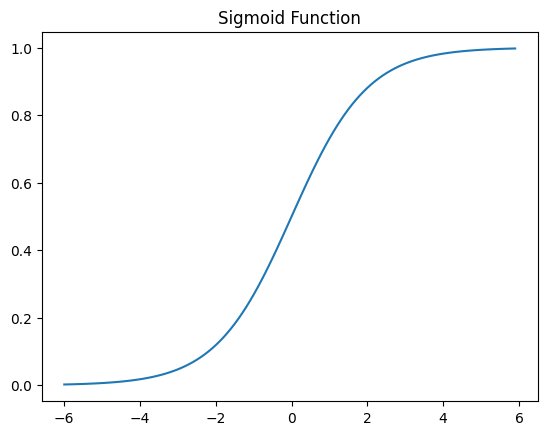

In [3]:
def sigmoid_function(num):
    return 1/(1 + np.exp(-num))

arr_x = np.arange(-6,6,0.1)
arr_y = sigmoid_function(arr_x)

plt.plot(arr_x,arr_y)
plt.title('Sigmoid Function')
plt.show()

The principal rationale behind the utilization of the sigmoid function as our hypothesis function resides in the phenomenon where, as the variable $z$ approaches positive infinity ($z\rightarrow \infty$), the function $g(z)$ converges asymptotically towards the value of 1. Conversely, as $z$ approaches negative infinity ($z\rightarrow -\infty$), the function $g(z)$ asymptotically tends towards the value of 0.

Hence, the utilization of the sigmoid function in regression facilitates binary classification tasks. However, it is crucial to acknowledge that the function $g(z)$ itself does not directly perform the classification, as our objective is to obtain discrete values of 0 and 1. To achieve this, we employ a <b><i>threshold function</i></b> that enables the conversion of the results obtained from the hypothesis function into binary values.

\begin{equation}
T(x) =
\begin{cases}
1 & \text{if } x > 0.5 \\
0 & \text{if } x \leq 0.5
\end{cases}
\end{equation}

To optimize the parameters θ, we employ the <b><i>maximum likelihood function</i></b> within a framework of probabilistic assumptions. So we assume that :

\begin{equation}
P(y = 1 | x;\theta) = h_{\theta}{(x)}
\\
P(y = 0 | x;\theta) = 1 - h_{\theta}{(x)}
\end{equation}

Given the binary nature of our classification problem with two classes, we can express the probability of a data point being labeled as 0 as $1 - h_{θ}(x)$, where $h_{θ}(x)$ represents the hypothesis function. The probility can be also be summarized more as below: <br><br>
<center>$p(y | x;\theta) = (h_{\theta}{(x)})^y (1 - h_{\theta}{(x)}))^{1-y}$</center>

And we define the likelihood function L(θ) as follows:

\begin{equation}
L{(\theta)} = \prod_{i = 1}^n p(y | X,\theta) = \prod_{i = 1}^n p(y^{(i)} | x^{(i)};\theta) = \prod_{i = 1}^n (h_{\theta}{(x^{(i)})})^{y^{(i)}} (1 - h_{\theta}{(x^{(i)})}))^{1-y{(i)}}
\end{equation}

We aspire to optimize the likelihood function, yet it is more convenient to optimize the natural logarithm of the likelihood.

\begin{equation}
l{(\theta)} = \log{L(\theta)} = \sum_{i = 1}^n y^{(i)} \log{h_{\theta}{((x)^{i})}} + (1 - y^{(i)}) \log(1 - h_{\theta}{(x)^{(i)}})
\end{equation}

Our objective is to optimize the likelihood function by maximizing it. In the realm of calculus, we understand that a function can reach its maximum point when it moves in the direction indicated by its gradient vector.

Due to the presence of multiple parameters in the parameter vector, it is necessary to compute the partial derivatives of our likelihood function l(θ). To simplify the calculations, we initially assume that we have a single data point. We will then extend our findings to accommodate multiple data points in a generalized manner.

\begin{equation}
\frac {\partial}{\partial \theta_j} l{(\theta)} = \frac{\partial}{\partial \theta_j} y \log{h_\theta (x)} + (1 - y) \log{(1 - h_\theta {(x)})}
\end{equation}

Previously, we defined our hypothesis function $h_\theta {(x)}$ as $g = 1/(1 + e^{\theta ^T x})$ . So we replace $h$ with $g$

\begin{equation}
\frac {\partial}{\partial \theta_j} l{(\theta)} = \frac{\partial}{\partial \theta_j} y \log{g(\theta^T{x})} + (1 - y) \log{(1 - g(\theta^Tx))} = ({y}\,{\frac{1}{g{(\theta^Tx})}} + (1-y)\, \frac{1}{1 - g(\theta^T x)}).\frac{1}{\ln 10}.\frac{\partial}{\partial \theta_j} g(\theta^T x)
\end{equation}

We can now extend our formulation to accommodate multiple data points, as desired. The complete formula can be expressed as follows:

\begin{equation}
\frac{\partial}{\partial \theta_j} l{(\theta)} = \frac{1}{\ln 10}.\sum_{i = 1}^n ({y^{(i)}}\,{\frac{1}{g{(\theta^Tx^{(i)}})}} + (1-y^{(i)})\, \frac{1}{1 - g(\theta^T x^{(i)})}).\frac{\partial}{\partial \theta_j} g(\theta^T x^{(i)}) \quad\quad (1)
\end{equation}

Now, let us proceed with computing the first partial derivative of our function, denoted as $g$. For the purpose of simplicity, we shall consider our function as $g(z) = \frac{1}{1 + \mathrm{e^{-z}}}$ .

\begin{align}
\frac{d}{dx} g(z) &= (-e^{-z})\cdot\frac{-1}{(1 + e^{-z})^2} \\
&= \frac{e^{-z}}{(1 + e^{-z})^2} \\
&= \frac{1}{1 + e^{-z}}\cdot\frac{e^{-z}}{1 + e^{-z}} \\
&= \frac{1}{1 + e^{-z}}\cdot(1 - \frac{1}{1 + e^{-z}})
\end{align}

Hence, the final equation can be expressed as follows:
<br>
<center> $ \frac{d}{dx} g(z) = g(z).(1 - g(z)) $ </center>

therefore we have:

\begin{align}
\frac{\partial}{\partial \theta_j} g(\theta^Tx) = \frac{\partial}{\partial \theta_j} \theta^T x . g(\theta^Tx).(1 - g(\theta^Tx)) \
= g(\theta^Tx).(1 - g(\theta^Tx)).x_j 
\end{align}

By substituting the aforementioned statement into equation (1), we derive the subsequent result:

\begin{align}
\frac{\partial}{\partial \theta_j} l(\theta) &= \frac{1}{\ln 10} \sum_{i = 1}^n \left(\frac{y^{(i)}}{g(\theta^Tx^{(i)})} + \frac{1-y^{(i)}}{1 - g(\theta^T x^{(i)})}\right) \frac{\partial}{\partial \theta_j} g(\theta^T x^{(i)}) \\
&= \frac{1}{\ln 10} \sum_{i = 1}^n \left(\frac{y^{(i)}}{g(\theta^Tx^{(i)})} + \frac{1-y^{(i)}}{1 - g(\theta^T x^{(i)})}\right) g(\theta^T x^{(i)}) (1 - g(\theta^Tx^{(i)}))x^{(i)}_j \\
&= \frac{1}{\ln 10} \sum_{i = 1}^n \left[y^{(i)}(1 - g(\theta^Tx^{(i)})) - (1 - y^{(i)})g(\theta^Tx^{(i)})\right]x^{(i)}_j \quad\quad\quad\quad g(\theta^Tx) = h_\theta(x) \\
& = \frac{1}{\ln 10}\sum_{i = 1}^n (y^{(i)} - h_\theta(x^{(i)}) x^{(i)}_j) \quad(2)
\end{align}

As previously mentioned, the process of maximizing the likelihood function involves moving in the direction indicated by the gradient. In mathematical terms, the gradient vector points in the direction of the steepest increase of the function. By following this direction, we can iteratively update the parameters to approach the maximum of the likelihood function.
So to update the parameter vector θ in order to maximize the likelihood function, we can use the gradient ascent algorithm. The parameter update step is given by: <br>
<center> $\theta := \theta + \alpha \nabla_\theta J{(\theta)} $ </center>

Upon substituting the second equation into the third equation, a resulting equation is obtained, which can be expressed as follows:

\begin{equation}
\theta := \theta + \alpha \nabla_\theta . \frac{1}{\ln 10}\sum_{i = 1}^n (y^{(i)} - h_\theta(x^{(i)}) x^{(i)}_j)
\end{equation}

In scientific analysis, it is often necessary to simplify equations by neglecting certain terms that have minimal impact on the overall result. In the given context, the term $\frac{1}{\ln 10}$ is being suggested as one such term that can be ignored. This simplification is justified by considering the presence of the constant $\alpha$. So the final equation is as below:

\begin{equation}
\theta := \theta + \alpha . \sum_{i = 1}^n (y^{(i)} - h_\theta(x^{(i)}))x^{(i)}_j \quad (3)
\end{equation}

To further simplify the summation term, we need to understand the concept of a <b><i>design matrix</i></b>. Let's assume we have a set of data points denoted by $i = 1, 2, ..., n$. In this context, the vector $x^{(i)}$ is defined as follows:

\begin{align}
    x^{(i)} &= \begin{bmatrix}
            x^{(i)}_0 \\
            x^{(i)}_1 \\
            \vdots \\
            x^{(i)}_d
         \end{bmatrix}
\end{align}

a <b><i>design matrix</i></b> is defined as below :

\begin{align}
X &= \begin{bmatrix}
        -(x^1)^{T}- \\
        -(x^2)^{T}- \\
        \vdots \\
        -(x^n)^{T}-
     \end{bmatrix}
     = 
     \begin{bmatrix}
         x_0^{(1)} \, x_1^{(1)} \dots \, x_d^{(1)} \\
         x_0^{(2)} \, x_1^{(2)} \dots \, x_d^{(2)} \\
         \vdots \vdots \\
         x_0^{(n)} \, x_1^{(n)} \dots \, x_d^{(n)}
     \end{bmatrix}
\end{align}

The $Y$ vector stores the assigned labels for each data point in a dataset. It is a crucial component in supervised machine learning, providing the necessary information for training and evaluation. In our binary classification dataset, $y^{(i)}$s are either 0 or 1.

\begin{align}
    Y &= \begin{bmatrix}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\
            y^{(n)}
         \end{bmatrix}
\end{align}

Additionally, we define the matrix $H$ as follows:

\begin{align}
    H &= \begin{bmatrix}
            h_\theta(x^{(1)}) \\
            h_\theta(x^{(2)}) \\
            \vdots \\
            h_\theta(x^{(n)})
         \end{bmatrix}
\end{align}

After careful consideration, we can simplify equation $(3)$ to the following expression:

\begin{equation}
\theta := \theta + \alpha . \sum_{i = 1}^n (y^{(i)} - h_\theta(x^{(i)}))x^{(i)}_j = \theta + \alpha.
\begin{bmatrix}
    Y - H
\end{bmatrix}
 .
X
\end{equation}

Indeed, it is now opportune to proceed with the practical <b>implementation</b> of the logistic regression algorithm.

<h1>Implementation</h1>

In [4]:
class LogisticRegression():
    def __init__(self,X,y):
        self.X = X
        self.y = y.T
        
    def hypothesis_function(self,params,x):
        return np.dot(params.T,x)
    
    def sigmoid_function(self,num):
        return 1/(1 + np.exp(-1*num))
    
    def train(self,lr = 0.1,n_iters = 1000):
        ones = np.ones([self.X.shape[0] , 1])
        self.X = np.hstack([ones, self.X])
        
        self.params = np.zeros([self.X.shape[1],1])
        
        i = 0
        while i < n_iters:
            diff = self.y - self.sigmoid_function(self.hypothesis_function(self.params,self.X.T))
            
            self.params = self.params + (lr/num_samples)*(np.dot(diff,self.X).T)
            
            i+=1
        
        return self.params
    
    def threshold_function(self,array):
        results = np.empty([0,])
        for item in array.reshape(-1,1):
            num = item[0]
            if num > 0.5:
                results = np.append(results,1)
            else:
                results = np.append(results, 0)
        return results

    def predict(self,x):
        length = len(x.shape)
        #Checking whether 'x' is a vector or a matrix
        
        if length == 1:
            #vectors have a (n,)-like shape
            x = np.concatenate([np.array([1]), x])
        else:
            #if not vector it is a (n,m)-like shape
            ones = np.ones([x.shape[0],1])
            #adding the interception terms
            x = np.hstack([ones,x])
            
        #Applying hypothesis function
        hypothesis_function = (self.hypothesis_function(self.params,x.T))
        #G function as defined
        g = 1/(1 + np.exp(-1*hypothesis_function))
        
        self.results = self.threshold_function(g)
        return self.results
        
        
            
lr = LogisticRegression(X,y)
print('Parameters:')
lr.train(n_iters=1000,lr = 0.1)

Parameters:


array([[ 4.64861154],
       [-1.79173594],
       [ 0.02360467]])

<h1>Accuracy</h1>

In the context of evaluating a trained model's performance, one commonly employed method is to calculate the accuracy score. This approach is particularly relevant in classification problems. To compute the accuracy score, one counts the number of correctly predicted instances and subsequently divides this count by the total number of predictions made by the model.

\begin{equation}
    Accuracy \,\, score = \frac{Correct Predictions}{Total Predictions}
\end{equation}

 In order to evaluate the accuracy of a classification model, one can utilize the accuracy_score function provided by the scikit-learn (sklearn) library in Python. This function facilitates the comparison between the predicted labels generated by the model and the true labels associated with the corresponding instances. By employing this function, an accuracy score is computed, reflecting the proportion of correctly classified instances out of the total number of instances.

In [5]:
from sklearn.metrics import accuracy_score

#X has all the data points and we would like to predict the classes of them
predictions = lr.predict(X)

print(accuracy_score(y,predictions))

0.943


<h1>Sklearn or our model ?</h1>

However, we endeavor to conduct a comparative analysis between our model and the logistic regression model integrated within the scikit-learn framework (sklearn).

In [6]:
from sklearn.linear_model import LogisticRegression

lr_sklearn = LogisticRegression(max_iter = 1000)
lr_sklearn.fit(X,y.reshape(-1,))

LogisticRegression(max_iter=1000)

In [7]:
sklearn_score = accuracy_score(y,lr_sklearn.predict(X))
print('Sklearn Score:',sklearn_score)

Sklearn Score: 0.943


Remarkably, our findings reveal that our trained model performs at a comparable level to the sklearn built-in logistic regression model, as evidenced by the similarity in the achieved scores. This outcome suggests that <b>our model</b> demonstrates <i><b>satisfactory performance and efficacy</b></i>.

References : <br>
<a href = "https://cs229.stanford.edu/main_notes.pdf"> CS229 Lecture Notes Stanford - Andrew Ng </a>
